In [2]:
import sys
import os
sys.path.append(os.path.abspath('../automaterialsdata/'))

from bert_util import make_embeddings

In [1]:
import torch
import os
import collections
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
import umap
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import plotly.io as plt_io
import plotly.graph_objects as go

from scipy.spatial import distance

import matplotlib.cm as cm

In [3]:
tokenizer = BertTokenizer.from_pretrained("allenai/scibert_scivocab_uncased", do_lower_case=True)   # import the models
model = BertModel.from_pretrained("allenai/scibert_scivocab_uncased")

Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
n_papers = 139
embed_dim = 768
n_paper_per_batch = 10
file_path = "/home/hanghu/Research/MSEdatapipeline/final_code_and_data/saeki_and_api_comparison.csv"

embed_df = make_embeddings(file_path, n_papers, embed_dim, n_paper_per_batch, model, tokenizer)

Embedding paper 1
  Done!
Embedding paper 2
  Done!
Embedding paper 3
  Done!
Embedding paper 4
  Done!
Embedding paper 5
  Done!
Embedding paper 6
  Done!
Embedding paper 7
  Done!
Embedding paper 8
  Done!
Embedding paper 9
  Done!
Embedding paper 10
  Done!
Embedding paper 11
  Done!
Embedding paper 12
  Done!
Embedding paper 13
  Done!
Embedding paper 14
  Done!
Embedding paper 15
  Done!
Embedding paper 16
  Done!
Embedding paper 17
  Done!
Embedding paper 18
  Done!
Embedding paper 19
  Done!
Embedding paper 20
  Done!
Embedding paper 21
  Done!
Embedding paper 22
  Done!
Embedding paper 23
  Done!
Embedding paper 24
  Done!
Embedding paper 25
  Done!
Embedding paper 26
  Done!
Embedding paper 27
  Done!
Embedding paper 28
  Done!
Embedding paper 29
  Done!
Embedding paper 30
  Done!
Embedding paper 31
  Done!
Embedding paper 32
  Done!
Embedding paper 33
  Done!
Embedding paper 34
  Done!
Embedding paper 35
  Done!
Embedding paper 36
  Done!
Embedding paper 37
  Done!
Embedding 

In [5]:
embed_df

,0,1,2,3,4,5,6,7,8,9,...,761,762,763,764,765,766,767,768,769,770
0,0.227985,-0.388920,-0.351519,0.253678,0.245367,0.026228,0.088714,0.562519,-0.195557,0.423887,...,-0.132773,-0.206555,0.181118,-0.083001,-0.321957,0.325639,-0.760854,Compared to regular conjugat...,10.1016/j.jechem.2020.11.021,API
1,0.516722,-0.231942,-0.124078,0.327597,-0.031120,-0.244082,0.406879,0.413662,-0.121250,0.277699,...,-0.014048,-0.189323,-0.076686,-0.023025,-0.082176,0.504635,-0.689245,Metal halide perovskite nanocrystals (NCs) exh...,10.1016/j.jechem.2020.10.023,API
2,0.115825,-0.481416,-0.037771,0.658707,0.140049,0.047127,0.122167,0.615080,0.005933,0.050321,...,-0.096115,-0.432808,0.016616,-0.653364,-0.319552,0.405504,-1.257481,"\n In recent years, photocata...",10.1016/j.jmst.2020.10.061,API
3,0.341961,-0.432086,-0.437096,0.528036,-0.067532,0.180761,0.254557,0.658745,0.001941,0.287001,...,-0.231743,-0.153580,0.005949,0.024658,-0.427895,0.385974,-0.819447,\n Guanidinium (GA) cations a...,10.1016/j.jechem.2020.09.036,API
4,0.143894,-0.568267,-0.159962,0.368089,-0.203749,-0.202491,0.122874,0.619819,-0.152927,0.076050,...,0.056031,-0.090152,-0.012467,-0.165064,0.018171,0.374654,-0.807790,\n Tandem solar cells represe...,10.1016/j.jechem.2020.09.022,API
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.458872,-0.158156,-0.186022,0.320366,-0.005779,-0.025869,0.230125,0.314732,-0.279476,0.398222,...,-0.135197,0.035640,-0.034707,0.127195,-0.144520,0.229002,-0.511901,"We synthesized a series of dithieno[3,2-b:2?,3...",10.1016/j.synthmet.2015.12.013,Saeki
135,0.562690,0.005401,-0.251101,0.384145,0.229747,-0.050025,0.149429,0.413178,-0.209014,0.470682,...,-0.294088,0.115259,0.272758,0.114733,-0.383253,0.500325,-0.518493,Two copolymers of donoracceptor (DA) type ba...,10.1016/j.synthmet.2015.12.016,Saeki
136,0.490828,-0.307565,-0.177792,0.331108,0.130399,0.133104,0.173881,0.409321,-0.163720,0.534305,...,-0.209725,-0.082450,0.030352,0.305475,0.044989,0.599948,-0.756897,A donor-acceptor conjugated polymer composed o...,10.1016/j.synthmet.2016.02.012,Saeki
137,0.428469,-0.341244,-0.088739,0.345904,0.201242,0.084698,0.067024,0.283331,-0.275666,0.443218,...,-0.222974,-0.069108,0.138879,-0.036471,-0.184251,0.374491,-0.836766,Two donor-acceptor alternative copolymers (P1 ...,10.1016/j.synthmet.2016.07.004,Saeki


In [8]:
x = embed_df.iloc[:, 0:768].values
y = embed_df.iloc[:, 770].values
x = StandardScaler().fit_transform(x)

In [13]:
# UMap dimensional reduction
reducer = umap.UMAP()   
red = reducer.fit_transform(x)


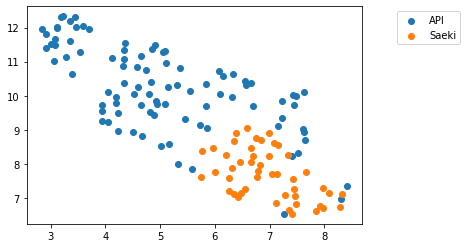

In [12]:
temp = pd.DataFrame(red)    # Plotting the dimensional reduction
embed_df.reset_index(drop=True, inplace=True)
temp = pd.concat([temp, embed_df.iloc[:,769], embed_df.iloc[:,770]], axis=1)
temp.columns = ["x", "y", "doi", "source"]
groups = temp.groupby("source")
for name, group in groups:
    plt.scatter(np.array(group["x"]), np.array(group["y"]), label=name)
    plt.legend(loc="upper center", bbox_to_anchor=(1.2, 1))

In [15]:
embed_redueced_df = embed_df.iloc[:, [770] + list(range(0,768))].groupby(by=embed_df.columns[770],as_index=False).mean().reset_index()

api_avg = embed_redueced_df.iloc[0,2:]
saeki_avg = embed_redueced_df.iloc[1,2:]

dst = distance.euclidean(api_avg, saeki_avg)
dst
#embed_df

3.037299795209003

### PCA

In [6]:
def top_n_closest(search_term_embedding, embeddings, original_abstracts, n=20):     # use cosine similarity function to find the top n most similar embeddings to the search term
    proximity_dict = {}
    i = 0
    for embedding in embeddings:
        proximity_dict[original_abstracts[i]] = {"score": get_similarity(embedding.unsqueeze(0),search_term_embedding), 
                                              "embedding":embedding.unsqueeze(0)}
        i+=1
    order_dict = collections.OrderedDict({k: v for k, v in sorted(proximity_dict.items(), key=lambda item: item[1]["score"])})
    proper_list = list(order_dict.keys())[-n:]
    proper_list.reverse()
    return proper_list, order_dict

In [144]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
author_df = pd.DataFrame(data=y)
finalDf = pd.concat([principalDf, author_df], axis = 1)

groups = finalDf.groupby(0)
for name, group in groups:
    plt.plot(group["principal component 1"], group["principal component 2"], marker="o", linestyle="", label=name, c=cm.hot())
    plt.legend(loc="upper center", bbox_to_anchor=(1.2, 1))

TypeError: __call__() missing 1 required positional argument: 'X'

In [43]:
x = embed_df.iloc[:, 0:767].values
y = embed_df.loc[:,['Author']].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
author_df = pd.DataFrame(data=y)
finalDf = pd.concat([principalDf, author_df], axis = 1)

finalDf = finalDf[finalDf['principal component 1'] < 20]

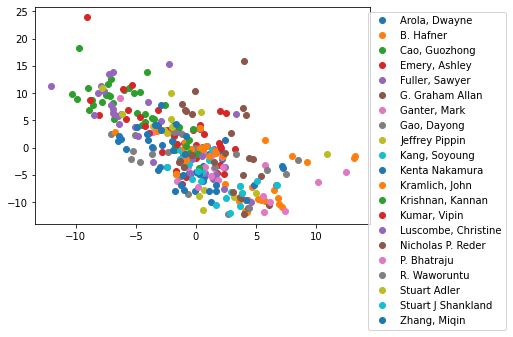

In [65]:
groups = finalDf.groupby(0)
for name, group in groups:
    plt.plot(group["principal component 1"], group["principal component 2"], marker="o", linestyle="", label=name)
    plt.legend(loc="upper center", bbox_to_anchor=(1.2, 1))

In [137]:
reducer = umap.UMAP()
red = reducer.fit_transform(author_df.iloc[:, 1:769])
make_plot(red, author_df.loc[:,["Author"]].values.ravel(), color_cats=author_df.loc[:,["Author"]].values.ravel())

In [102]:
digits_df = pd.DataFrame(red, columns=('x', 'y'))
digits_df['Author'] = author_df.loc[:,["Author"]].values.ravel()

In [88]:
mapper = umap.UMAP().fit(embed_df.iloc[:, 0:767].values)
umap.plot.points(mapper)

AttributeError: module 'umap' has no attribute 'plot'

In [150]:
embed_df.iloc[:, 0:767].values

array([[ 0.270888  , -0.19209577,  0.09726094, ..., -0.07382976,
        -0.06221451, -0.14940694],
       [ 0.22799523, -0.42405671,  0.32971144, ..., -0.21385185,
        -0.00735444, -0.12290189],
       [ 0.14071046, -0.69811326,  0.2810216 , ...,  0.0949676 ,
        -0.3485266 ,  0.32220089],
       ...,
       [ 0.29056981, -0.42492214,  0.12834874, ...,  0.02945401,
         0.06248645,  0.22965595],
       [ 0.20185266, -0.69690418,  0.09232721, ..., -0.3652119 ,
        -0.14995924,  0.2182343 ],
       [ 0.19039516, -0.65541333, -0.27251258, ..., -0.05378778,
        -0.22639503,  0.40103015]])

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 311 samples in 0.028s...
[t-SNE] Computed neighbors for 311 samples in 0.119s...
[t-SNE] Computed conditional probabilities for sample 311 / 311
[t-SNE] Mean sigma: 9.253271
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.153816
[t-SNE] KL divergence after 900 iterations: 0.707696


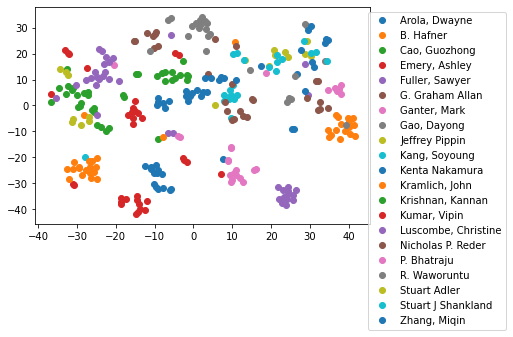

In [44]:
from sklearn.manifold import TSNE

# time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=900)
tsne_results = tsne.fit_transform(x)



tsne1 = tsne_results[:,0]
tsne2 = tsne_results[:,1]

tsnedf = pd.DataFrame()
tsnedf['Component 1'] = tsne1
tsnedf['Component 2'] = tsne2
tsnedf['Author'] = y

groups = tsnedf.groupby("Author")

for name, group in groups:
    plt.plot(group['Component 1'], group['Component 2'], marker="o", linestyle="", label=name)
plt.legend(loc="upper center", bbox_to_anchor=(1.2, 1))

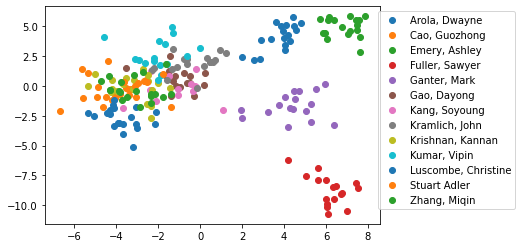

In [70]:
X_LDA = LDA(n_components=2).fit_transform(x,y)
X_LDA = pd.DataFrame(X_LDA)
X_LDA['Author'] = y

groups = X_LDA.groupby("Author")

for name, group in groups:
    plt.plot(group[0], group[1], marker="o", linestyle="", label=name)
plt.legend(loc="upper center", bbox_to_anchor=(1.2, 1))

In [94]:
def get_results(title_list, abstract_list, embed_list):
    index = 0
    title = []
    matches = []
    while index < len(embed_list):
        search_term = embed_text(abstract_list[index], model).mean(1)

        embeds = torch.cat([embed_list[0:index], embed_list[index+1:]])

        titles = title_list.copy()
        del titles[index]

        abstracts = abstract_list.copy()
        del abstracts[index]

        top_paper, order_dict = top_n_closest(search_term, embeds, abstracts)
        title.append(title_list[index])
        matches.append(top_paper[0])
        index+=1
    df = pd.DataFrame({'Title': title, 'Match': matches})
    df.to_csv('C:/Users/Adam/Documents/Senior Project/Paper Browser/res/results/test_set.csv')

In [95]:
get_results(title_list, abstract_list, embed_list)

In [26]:
q1 = "A highly soluble polycarbazole (PCz) has been synthesized, and used as a donor material with perylene tetracarboxydiimide (PDI) as an acceptor and light harvesting material in bulkheterojunction solar cells. This donor/acceptor (D/A) pair shows a broad absorption fit within the solar spectrum, and balanced potential levels for charge separation at the D/A interface. The best photovoltaic device exhibits a high external quantum efficiency (EQE) of 16% at 490 nm and a power efficiency of 0.6% under illumination with solar light. The morphology of PCz/PDI films studied by SEM showed the formation of a favorable micro-phase separation, which is important in obtaining high efficiency. Incorporation of poly(3-hexyl)thiophene (P3HT) instead of PCz as donor produced a much lower Voc and thus a lower efficiency in solar cells."
search_terms = embed_text(q1, model).mean(1)

In [30]:
top_abstracts, order_dict = top_n_closest(search_terms, embed_list, abstract_list)

top_abstracts

['\n                  Mixed cation and anion based perovskites solar cells exhibited enhanced stability under outdoor conditions, however, it yielded limited power conversion efficiency when TiO2 and Spiro-OMeTAD were employed as electron and hole transport layer (ETL/HTL) respectively. The inevitable interfacial recombination of charge carriers at ETL/perovskite and perovskite/HTL interface diminished the efficiency in planar (n-i-p) perovskite solar cells. By employing computational approach for uni-dimensional device simulator, the effect of band offset on charge recombination at both interfaces was investigated. We noted that it acquired cliff structure when the conduction band minimum of the ETL was lower than that of the perovskite, and thus maximized interfacial recombination. However, if the conduction band minimum of ETL is higher than perovskite, a spike structure is formed, which improve the performance of solar cell. An optimum value of conduction band offset allows to reac

In [11]:
q2 = "A bending beam method has been developed to measure the elastic modulus E, the coefficient of thermal expansion (CTE) and the Poisson ratio ν for on-wafer dielectric films with thicknesses in the submicron range. The method was demonstrated for 0.5 μm thick silicon dioxide films made from tetraethylorthosilane (TEOS). First, the biaxial elastic modulus E/(1-ν) and CTE were measured on blanket TEOS on Si and GaAs substrates and found to be 77 GPa and 1.0 ppm/°C, respectively. The Poisson ratio ν was determined by combining the finite element calculation and the experimental result of the thermal stresses of TEOS fine lines on the Si substrate. The Poisson ratio of TEOS was determined to be 0.24 and, as a consequence, the Young’s modulus was 59 GPa. Fourier transform infrared spectra were obtained for TEOS films on the Si and GaAs substrates to ensure that the chemical structure of the film is independent of the substrate."
search_terms2 = embed_text(q2, model).mean(1)

In [29]:
top_abstracts, order_dict = top_n_closest(search_terms2, embed_list, abstract_list)

top_abstracts

NameError: name 'search_terms2' is not defined